<a href="https://colab.research.google.com/github/AlbertFlorinus/Petrinet/blob/dev/nxPetrinet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.layout import bipartite_layout
import random
import os

!git clone https://github.com/AlbertFlorinus/Petrinet/
os.chdir('Petrinet')
from nx_petri import Pnet, B, colab_plot_detail, simsims_ex

fatal: destination path 'Petrinet' already exists and is not an empty directory.


In [ ]:
Pnet.add_road("r1", start_workers = 1)
Pnet.add_road("r2", start_workers = 1)
Pnet.add_barn("b1", start_food = 1)

Pnet.add_farm("farm_1")

Pnet.create_edge("r1", "farm_1")
Pnet.create_edge("farm_1", "b1")
Pnet.create_edge("farm_1", "r2")

In [ ]:
def basic():
    #a graph with only one transition.
    
    Pnet.add_road("r1", start_workers=3)
    Pnet.add_road("r2", start_workers=3)
    Pnet.add_storage("s1", start_products=1)
    Pnet.add_barn("l1", start_food= 2)

    Pnet.add_house("house_1")
    Pnet.create_edge("r1", "house_1")
    Pnet.create_edge("r2", "house_1")
    Pnet.create_edge("s1", "house_1")
    Pnet.create_edge("house_1", "r1")

In [ ]:
#simsims_ex follows the graph layout provided here
# https://bth.instructure.com/courses/3539/pages/simsims
simsims_ex()

In [ ]:
def deterministic(order):

    #helper code to determine whether to end the simulation
    places = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}

    roads_places = {i for i in places if B.nodes(data = True)[i]["color"] == "Road"}
    c0 = 0

    for i in order:
        c0 += 1
        p0 = [len( B.nodes[i]["holdings"] ) for i in roads_places]
        #if 0 in p0:
        if all(v == 0 for v in p0):
            #all(v == 0 for v in values)
            print(p0)
            print(B.nodes(data=True))
            print(f"simulation ended at {c0} iterations. ")
            break

        
        B.nodes[i]["trans"][0].fire()


In [ ]:
def stochastic_iteration(n):
    #of n iterations
    orig_state = list(f"{n}: {len(d['holdings'])} " for n, d in B.nodes(data=True) if d["bipartite"] == 0)
    #takes only the transition nodes, ie bipartite = 1
    transit_lst = [t for t in B.nodes if B.nodes[t]["bipartite"] == 1]
    sequence = [random.choice(transit_lst) for i in range(n)]
    #calls the "deterministic funtion, whats random here is merely the sequence to simulate"
    deterministic(sequence)

    new_state = list(f"{n}: {len(d['holdings'])} " for n, d in B.nodes(data=True) if d["bipartite"] == 0)
    print("\n \n --------")
    print(f"name: amount of tokens")

    for i, j in zip(orig_state, new_state):
        print(i, "-->", j)

In [ ]:
stochastic_iteration(4)

diner_2 fired
factory_2 fired
farm_1 fired
farm_2 fired

 
 --------
name: amount of tokens
r1: 3  --> r1: 4 
r2: 4  --> r2: 3 
l1: 5  --> l1: 6 
l2: 3  --> l2: 3 
s1: 4  --> s1: 5 


In [ ]:
def disp(G):
    val_map ={node: float(G.nodes[node]["COLOR"]) for node in G.nodes() }
    values = [val_map.get(node, 0.25) for node in G.nodes()]
    nx.draw(G,pos = nx.kamada_kawai_layout(B), arrows=True,cmap=plt.get_cmap("viridis"), node_color = values, with_labels = True)

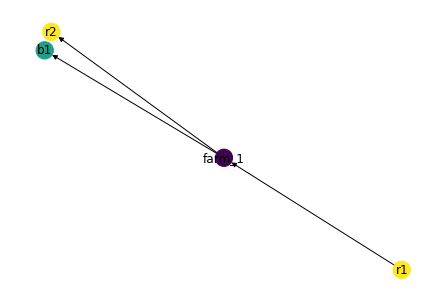

In [ ]:
disp(B)

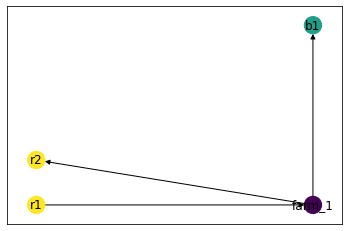

In [ ]:
val_map ={node: float(B.nodes[node]["COLOR"]) for node in B.nodes() }    
values = [val_map.get(node, 0.25) for node in B.nodes()]
nx.draw_networkx(B, pos = bipartite_layout(B, ["r1","r2", "l1", "l2", "s1"]), node_color = values, width = 1)

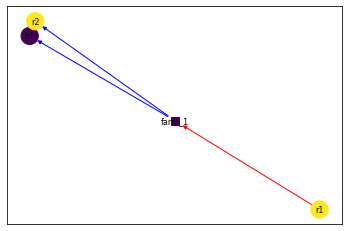

In [ ]:
colab_plot_detail()